Importing libraries

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing data. Test data is not labelled or does not contain the churn column.
Hence we will divide the train data into train and test.

In [169]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df.shape

(4250, 20)

Exploratory Data Analysis

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Checking for null values

In [171]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Checking for any redundant or abnormal data in categorical variables.
Finding - Our target variable "churn" is highly imbalanced. This could create a bad prediction on class yes.

In [172]:
for x in df.columns:
    if df[x].dtype == "object":
        print(x)
        print(df[x].value_counts(),"\n")

state
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
OH     95
WY     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
IN     83
NV     83
MS     82
DE     80
WA     80
MT     80
MO     80
NC     80
CO     80
IL     79
TN     79
NH     78
OK     78
NM     78
HI     77
AZ     77
FL     76
SD     75
NE     73
SC     72
DC     72
AR     71
LA     69
ND     67
PA     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64 

area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64 

international_plan
no     3854
yes     396
Name: international_plan, dtype: int64 

voice_mail_plan
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64 

churn
no     3652
yes     598
Name: churn, dtype: int64 



Feature engineering and reduction:
Here we have combined the calls, charges and minutes for the entire day.

In [173]:
df["total_calls"] = df["total_day_calls"] + df["total_eve_calls"] + df["total_night_calls"]
df["total_charge"] = df["total_day_charge"] + df["total_eve_charge"] + df["total_night_charge"]
df["total_minutes"] = df["total_day_minutes"] + df["total_eve_minutes"] + df["total_night_minutes"]

df = df.drop(['total_day_calls','total_eve_calls','total_night_calls','total_day_charge','total_eve_charge','total_night_charge','total_day_minutes','total_eve_minutes','total_night_minutes'],axis=1)

Seperating categorical and numerical variables and storing in a list.

In [174]:
cat_var=[]
num_var=[]

for x in df.columns:
    if df[x].dtype == "int64" or df[x].dtype == "float64":
        num_var.append(x)
    else:
        cat_var.append(x)

Visualizating numerical data for their distributions.
number_vmail_messages has most of the data as 0. Hence dropping this column

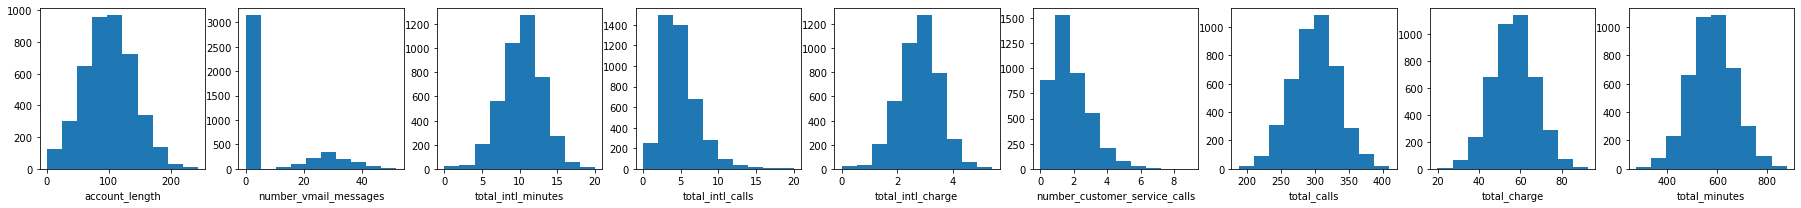

In [175]:
j=1
plt.figure(figsize=(35,35))
for x in num_var:
    plt.subplot(10,10,j)
    plt.hist(df[x])
    plt.xlabel(x)
    j+=1
    
#number_vmail_messages has most of entries as 0

In [176]:
df = df.drop(["number_vmail_messages"], axis =1)

Plotting 1st correlation matrix to identify multicollinearity. Found that charge and minutes\
are multi collinear and hence dropping the minutes variable.

<AxesSubplot:>

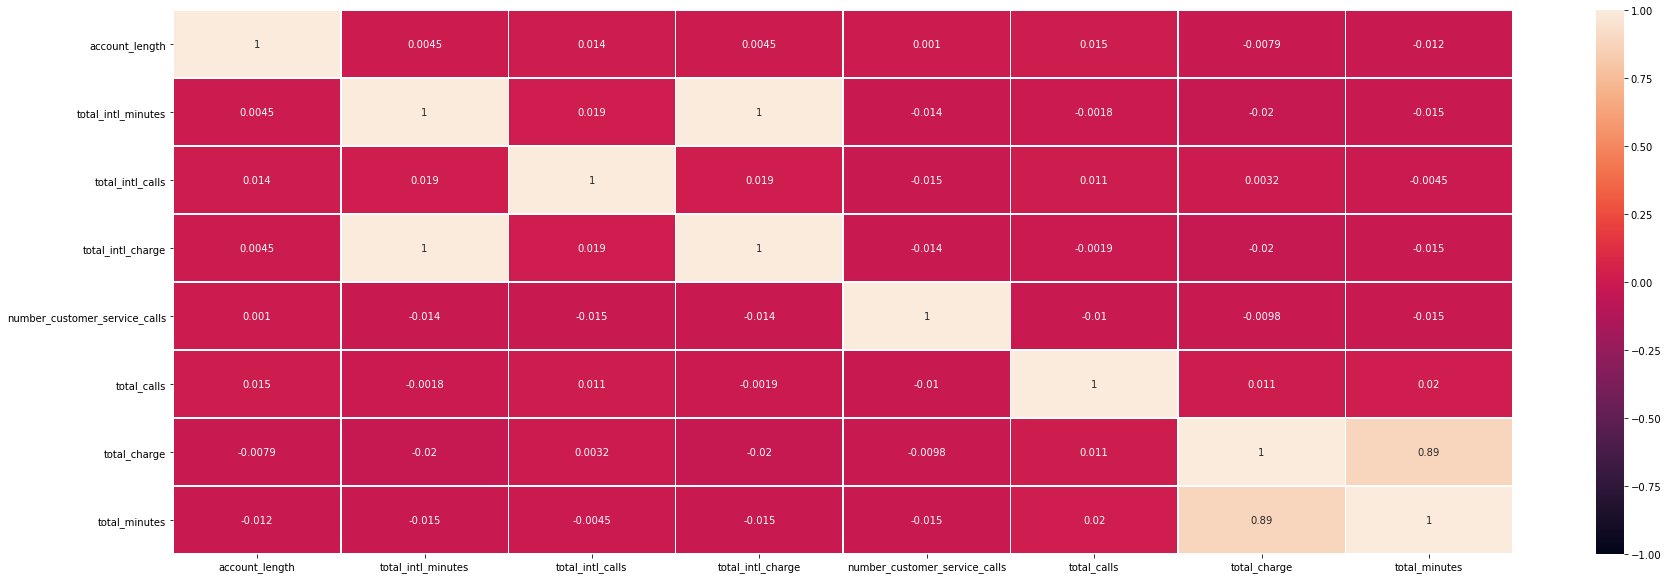

In [177]:
corr_df=df.iloc[:,:].corr(method="pearson")
#print(corr_df)
plt.figure(figsize = (30,10)) #Change the size of heatmap 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True,linewidths=.5)

In [178]:
df = df.drop(["total_minutes","total_intl_minutes"],axis=1)

Label encoding all categorical variables

In [179]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for x in cat_var:
    df[x] = le.fit_transform(df[x])
    le_maping = dict(zip(le.classes_,le.transform(le.classes_)))
    print(x,le_maping)

state {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}
area_code {'area_code_408': 0, 'area_code_415': 1, 'area_code_510': 2}
international_plan {'no': 0, 'yes': 1}
voice_mail_plan {'no': 0, 'yes': 1}
churn {'no': 0, 'yes': 1}


Plotting 2nd correlation matrix with all categorical variables to identify relation with target variable.\
Findings - International_plan, number_customer_service_calls and total_charge have a good correlation with the target variable.

<AxesSubplot:>

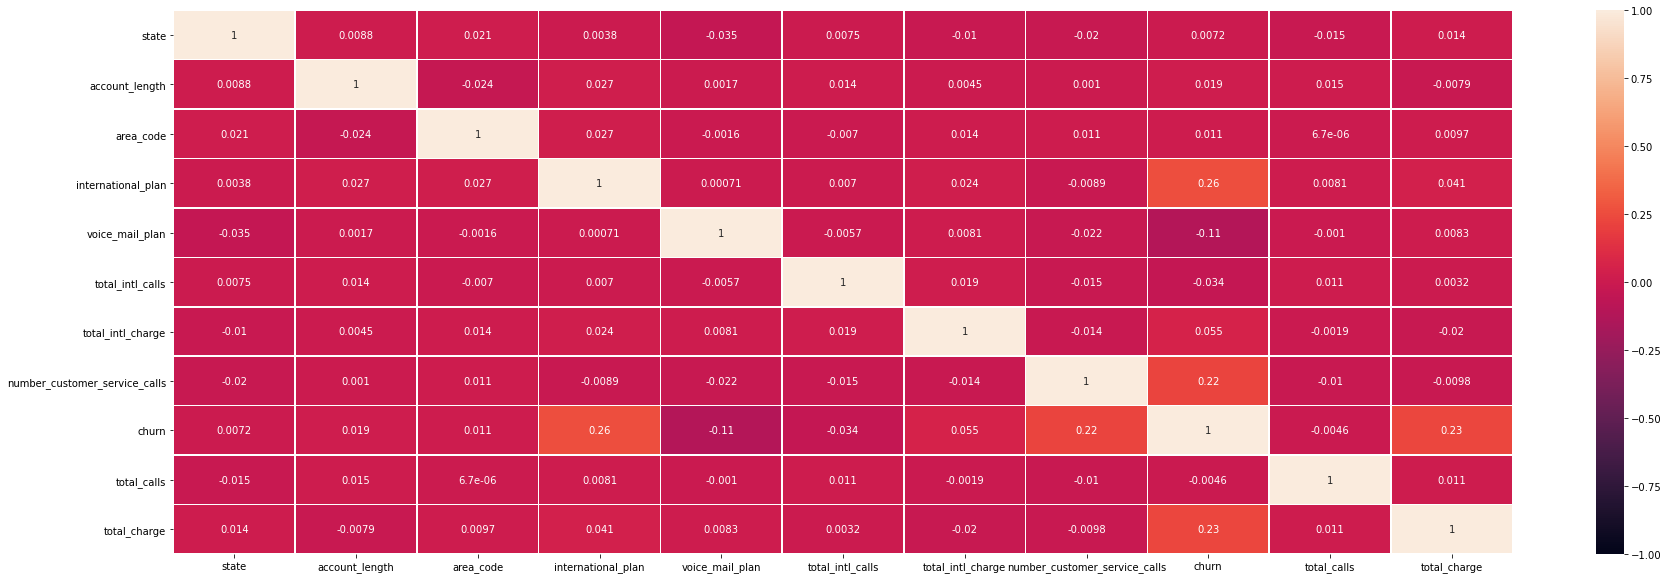

In [180]:
corr_df=df.iloc[:,:].corr(method="pearson")
#print(corr_df)
plt.figure(figsize = (30,10)) #Change the size of heatmap 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True,linewidths=.5)

Seperating the churn variable with rest of the variables.

In [181]:
X = df.loc[:,df.columns != 'churn']
Y = df.loc[:,df.columns == 'churn']

Performing train test split

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state = 10)

Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

C:\Users\PARSHVA\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\PARSHVA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.865546218487395

In [184]:
Y_pred = model.predict(X_test)

In [185]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1074   21]
 [ 147   33]]

0.8682352941176471
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1095
           1       0.61      0.18      0.28       180

    accuracy                           0.87      1275
   macro avg       0.75      0.58      0.60      1275
weighted avg       0.84      0.87      0.84      1275



Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,Y_train )
clf.score(X_train, Y_train)

<ipython-input-186-5e7d161455bb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train )


1.0

In [187]:
Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1095    0]
 [  35  145]]

0.9725490196078431
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1095
           1       1.00      0.81      0.89       180

    accuracy                           0.97      1275
   macro avg       0.98      0.90      0.94      1275
weighted avg       0.97      0.97      0.97      1275



The most important features for our model were:
total_charge
international_plan
number_customer_service_calls